In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load data and look at some of the high level stats
    1. data type
    2. find any null values
    3. print summary stats for all variables

In [2]:
full_df = pd.read_csv('bank_marketing.csv')
full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [4]:
full_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
full_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
full_df.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


## Data dictionary

| Attribute/Variable | Description |
|---:|---:|
| Age | Age of customer |
| Job | Type of job |
| Marital | Marital status |
| Education | Education of the customer |
| Default | Shows whether the customer has credit in default or not |
| Balance | Average yearly balance in Euros |
| Housing | Shows whether the customer has housing loan or not |
| Loan | Shows whether the customer has personal loan or not |
| Contact | Shows how the last contact for marketing campaign has been made |
| Day | Shows on which day of the month last time customer was contacted |
| Month | Shows on which month of the year last time customer was contacted |
| Duration | Shows the last contact duration in seconds |
| Campaign | Number of contacts performed during the marketing campaign and for this customer |
| Pdays | Number of days that passed by after the client was last contacted from aprevious campaign	numeric, -1 means client was not previously contacted |
| Previous | Number of contacts performed before this campaign and for this client |
| Poutcome | Outcome of the previous marketing campaign |
| Y | Class attribute showing whether the client has subscribed a term deposit or not |




## Step 1.0:
### Early transformation
Based on the stats above we can transform a few variables right away to save some time.<br>

Convert <b>y</b> (success of campaign) to a numeric variable so we can calculate the mean value for success of campaign.<br>
Convert <b>month</b> to numeric just so we can chart it in order 1-12.<br>
Convert <b>duration</b> from seconds to minutes so we can interpert it a little easier.<br> 

In [7]:
full_df['success'] = full_df['y'].map({'yes':1, 'no':0})

month_to_num = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
full_df['month'] = full_df['month'].map(month_to_num)

full_df['duration'] = full_df['duration']/60

In [9]:
#unbalanced
full_df['success'].value_counts()

0    4000
1     521
Name: success, dtype: int64

## Step 1.1:
## Categorical variables 

Look at all the categorical variables and get a bar chart based on count and one based on success of campaign.  
This will give use a better understanding of what variable may be important and what variable may be unbalanced or contain outliers.


In [10]:
full_df.describe(include=[np.object])

,job,marital,education,default,housing,loan,contact,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,3705,4000


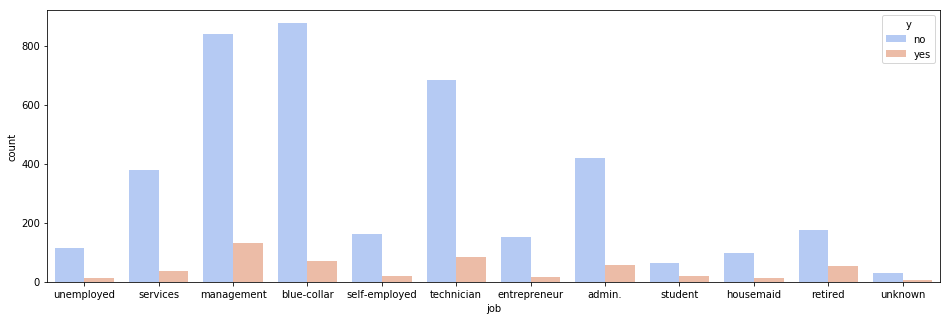

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x='job',hue='y',data=full_df,palette='coolwarm')

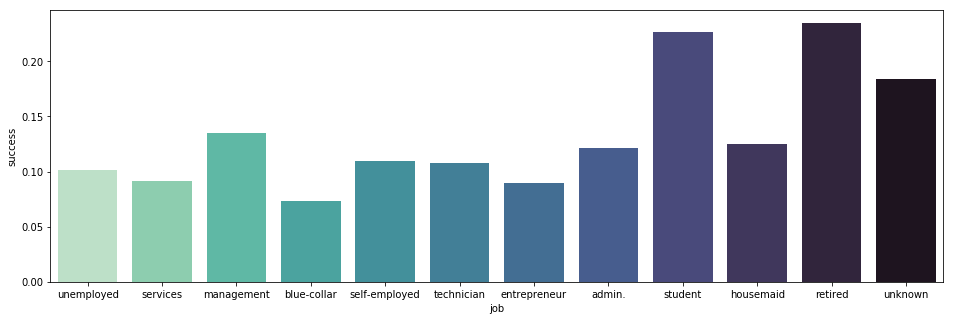

In [12]:
# A look at the job category shows that Student, Retired and Unknown have the highest rate of success 
# in opening a new account with the bank as a result of the marketing campaign.

plt.figure(figsize=(16,5))
sns.barplot(x="job", y='success', data=full_df, palette='mako_r', ci=None)

In [13]:
full_df[['job','success']].groupby(['job'], as_index=False).mean().sort_values(by='success', ascending=False)

,job,success
5,retired,0.234783
8,student,0.226190
11,unknown,0.184211
4,management,0.135191
3,housemaid,0.125000
0,admin.,0.121339
6,self-employed,0.109290
9,technician,0.108073
10,unemployed,0.101562
7,services,0.091127


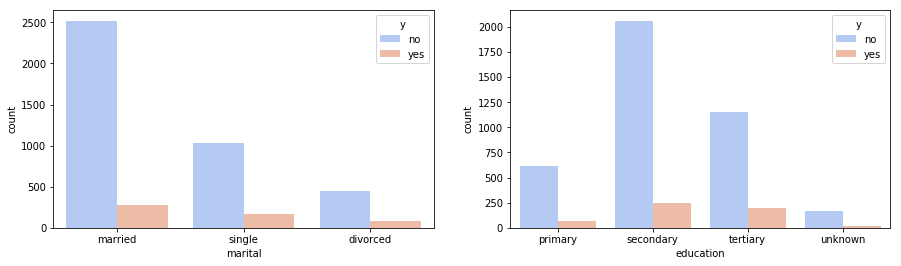

In [14]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='marital',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.countplot(x='education',hue='y',data=full_df,palette='coolwarm',ax=axes[1])

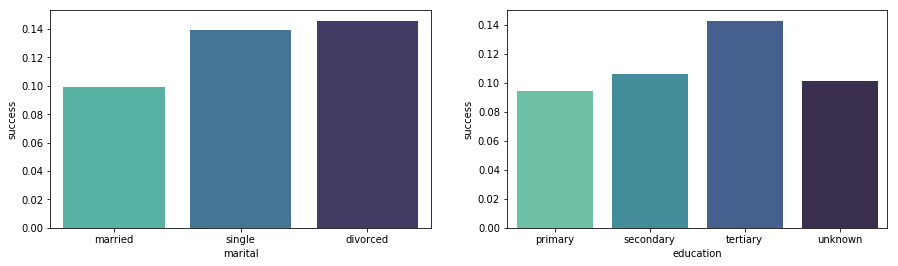

In [15]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='marital',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[0])
sns.barplot(x='education',y='success',data=full_df,palette='mako_r' ,ci=None,ax=axes[1])

In [16]:
full_df[['marital','success']].groupby(['marital'], as_index=False).mean().sort_values(by='success', ascending=False)

,marital,success
0,divorced,0.145833
2,single,0.139632
1,married,0.099035


In [17]:
full_df[['education','success']].groupby(['education'], as_index=False).mean().sort_values(by='success', ascending=False)

,education,success
2,tertiary,0.142963
1,secondary,0.106245
3,unknown,0.101604
0,primary,0.094395


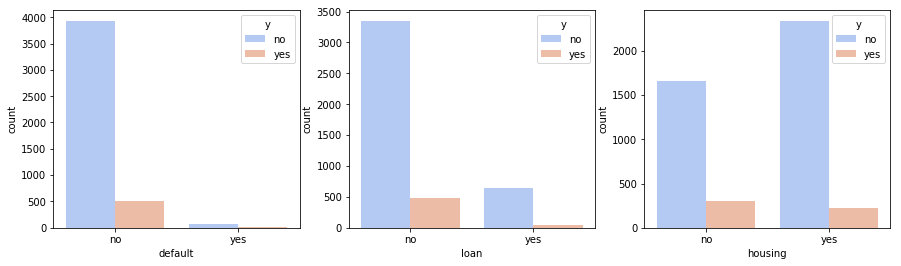

In [18]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.countplot(x='default',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.countplot(x='loan',hue='y',data=full_df,palette='coolwarm',ax=axes[1])
sns.countplot(x='housing',hue='y',data=full_df,palette='coolwarm',ax=axes[2])

In [19]:
full_df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

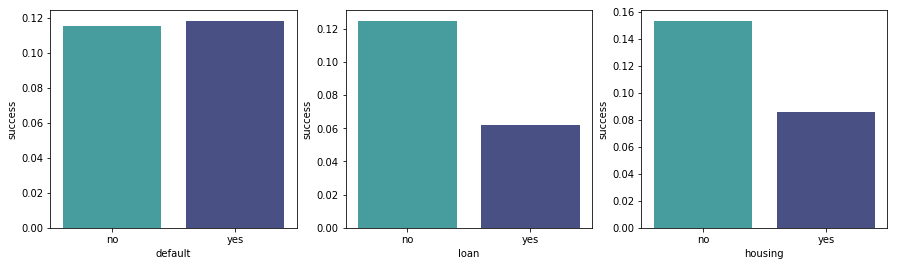

In [20]:
# The results make some sence here.  If you have a loan or a house you are probably less likely to say yes to opening up a
# new savings account as they are probably paying of said loan or house.

fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='default',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[0])
sns.barplot(x='loan',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])
sns.barplot(x='housing',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[2])

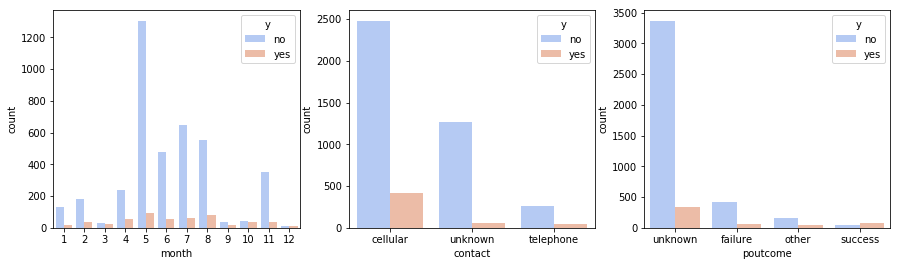

In [21]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.countplot(x='month',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.countplot(x='contact',hue='y',data=full_df,palette='coolwarm',ax=axes[1])
sns.countplot(x='poutcome',hue='y',data=full_df,palette='coolwarm',ax=axes[2])

In [22]:
full_df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

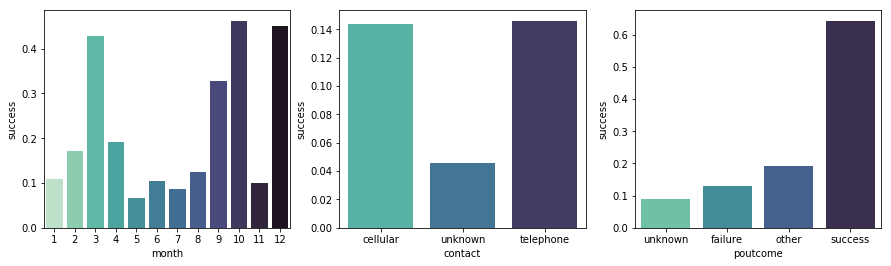

In [23]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='month',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[0])
sns.barplot(x='contact',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])
sns.barplot(x='poutcome',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[2])

In [24]:
full_df[['poutcome','success']].groupby(['poutcome'], as_index=False).mean().sort_values(by='success', ascending=False)

,poutcome,success
2,success,0.643411
1,other,0.192893
0,failure,0.128571
3,unknown,0.090958


## Results: Categorical variables 

### Keep:

    1. job 
    2. education
    3. marital
    4. loan
    5. housing

<h5>poutcome - DROP</h5> 
poutcome looks really promising in-terms of predicting whether a client will add an account based off the 64% that had previously committed to another campaign also said yes to this one. However, the total unknowns collected means that most of this variable is usless. As such it should probably be cut from final analysis. 

<h5>contact - DROP</h5>
This is another variable that suffers from a large amount of unknown or 'missing data'. in addition to the unknown data cellular and telephone show essentially the same success rate as one another, and therefore doesn't really provide us with anything useful.

<h5>default - DROP</h5>
The default variable is a little different as there are no unknowns but 90% of the data set has report no as to whether they have defaulted on a loan. Again, because of this imbalance the default varaiable should be dropped.   

<h5>month - DROP</h5>
Month variable may be worth looking at but for the purpose of simplicity will be removed for this analysis.

## Step 1.2:
## Continuous variables 

Plot them using Kernel Density Plots.

A Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

An advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (each bar used in a typical histogram). A Histogram comprising of only 4 bins wouldn't produce a distinguishable enough shape of distribution as a 20-bin Histogram would. However, with Density Plots, this isn't an issue.

https://datavizcatalogue.com/methods/density_plot.html

In [25]:
full_df.describe()

,age,balance,day,month,duration,campaign,pdays,previous,success
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,6.166777,4.399355,2.793630,39.766645,0.542579,0.115240
std,10.576211,3009.638142,8.247667,2.378380,4.330944,3.109807,100.121124,1.693562,0.319347
min,19.000000,-3313.000000,1.000000,1.000000,0.066667,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,5.000000,1.733333,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,6.000000,3.083333,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,8.000000,5.483333,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,12.000000,50.416667,50.000000,871.000000,25.000000,1.000000


Text(0.5,1,'Age')

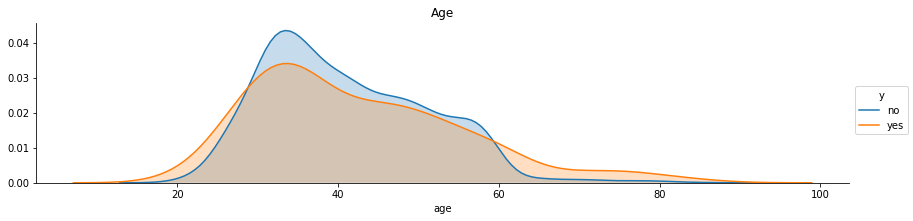

In [27]:
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.add_legend()
plt.title('Age')

Text(0.5,1,'Balance')

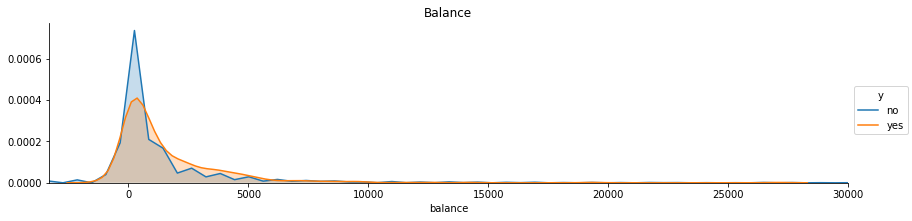

In [28]:
# use seaborn charting to take a look at the distribution of 'balance' and whether client agreed to promotion 
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'balance',shade= True)
facet.set(xlim=(full_df['balance'].min(), 30000)) #use a cap on max value b/c of a couple outliers (71188, 42045)
facet.add_legend()
plt.title('Balance')

Text(0.5,1,'Shows the last contact duration in minutes')

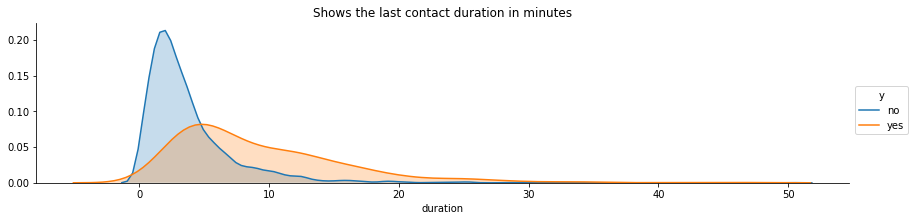

In [29]:
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'duration',shade= True)
facet.add_legend()
plt.title('Shows the last contact duration in minutes')

Text(0.5,1,'Number of contacts performed during the marketing campaign for this customer')

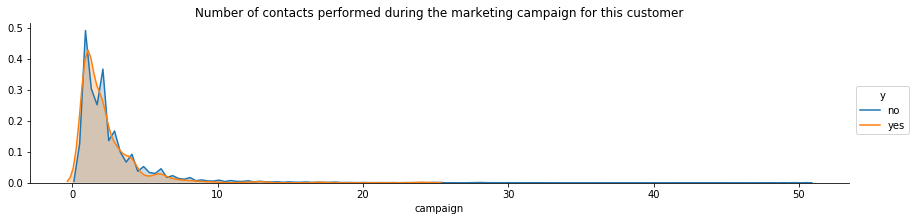

In [30]:
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'campaign',shade= True)
facet.add_legend()
plt.title('Number of contacts performed during the marketing campaign for this customer')

In [31]:
full_df['campaign'].value_counts().head()

1    1734
2    1264
3     558
4     325
5     167
Name: campaign, dtype: int64

Text(0.5,1,'Number of days that passed by after the client was last contacted from aprevious campaign')

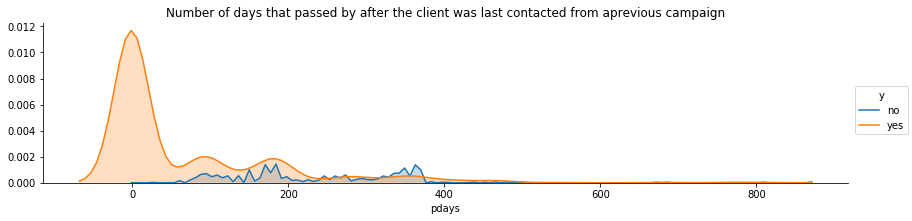

In [32]:
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'pdays',shade= True)
facet.add_legend()
plt.title('Number of days that passed by after the client was last contacted from aprevious campaign')

In [33]:
full_df['pdays'].value_counts().head()

-1      3705
 182      23
 183      20
 363      12
 92       12
Name: pdays, dtype: int64

Text(0.5,1,'Number of contacts performed before this campaign and for this client')

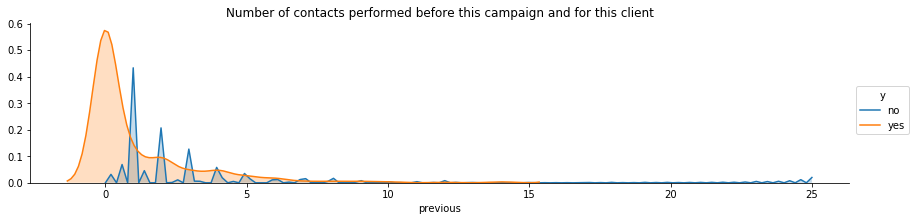

In [34]:
facet=sns.FacetGrid(full_df, hue='y',aspect=4)
facet.map(sns.kdeplot,'previous',shade= True)
facet.add_legend()
plt.title('Number of contacts performed before this campaign and for this client')

In [35]:
full_df['previous'].value_counts().head()

0    3705
1     286
2     193
3     113
4      78
Name: previous, dtype: int64

## Step 1.3:
## Continuous variables - transformed to categorical

The 3 variables that relate to if a customer was contacted seem like they could be transformed to one variable as opposed to 3.
<b>campaign</b> and <b>previous</b> should be one, and <b>pday</b> and previous both suffer from a lot of 0 values indicating that the client was not contacted. By combining campaign and previous we can still keep a variable for whether the client had been contact and we can drop pdays as it is unbalanced and would capture some of the same info that the new combined variable would contain. 

In [36]:
full_df['was_contacted'] = full_df['previous']+full_df['campaign']

In [37]:
full_df[['pdays','previous','campaign','was_contacted']].head()

,pdays,previous,campaign,was_contacted
0,-1,0,1,1
1,339,4,1,5
2,330,1,1,2
3,-1,0,4,4
4,-1,0,1,1


In [38]:
bins = [0,2,6,11,100]
bin_labels = ['1','2-5','6-10','> 10']
full_df['was_contacted_cat'] = pd.cut(full_df.was_contacted, bins, right=False, labels = bin_labels)

In [39]:
full_df['was_contacted_cat'].value_counts()

2-5     2517
1       1309
6-10     521
> 10     174
Name: was_contacted_cat, dtype: int64

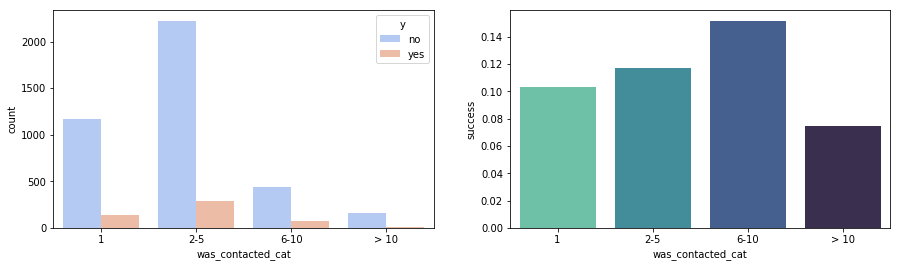

In [40]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='was_contacted_cat',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.barplot(x='was_contacted_cat',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])

In [41]:
bins = [0,30,40,50,60,100]
bin_labels = ['0-29','30-39','40-49','50-59','60+']
full_df['age_group'] = pd.cut(full_df.age, bins, right=False, labels = bin_labels)

In [42]:
full_df['age_group'].value_counts()

30-39    1808
40-49    1203
50-59     854
0-29      482
60+       174
Name: age_group, dtype: int64

In [43]:
full_df[['age_group', 'success']].groupby(['age_group'], as_index=False).mean()

,age_group,success
0,0-29,0.153527
1,30-39,0.102323
2,40-49,0.102244
3,50-59,0.098361
4,60+,0.316092


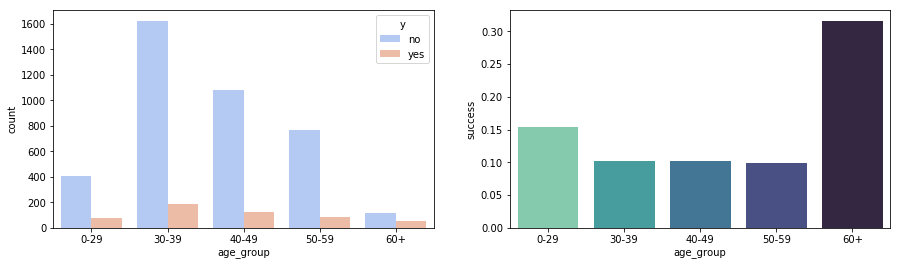

In [44]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='age_group',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.barplot(x='age_group',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])

In [45]:
bins = [-3500,1,1000,5000,10000,100000]
bin_labels = ['< 0','1-999','1000-4999','5000-9999','10000+']
full_df['balance_group'] = pd.cut(full_df.balance, bins, right=False, labels = bin_labels)

In [46]:
full_df['balance_group'].value_counts()

1-999        2317
1000-4999    1172
< 0           723
5000-9999     217
10000+         92
Name: balance_group, dtype: int64

In [47]:
full_df[['balance_group', 'success']].groupby(['balance_group'], as_index=False).mean()

,balance_group,success
0,< 0,0.082988
1,1-999,0.103582
2,1000-4999,0.159556
3,5000-9999,0.133641
4,10000+,0.054348


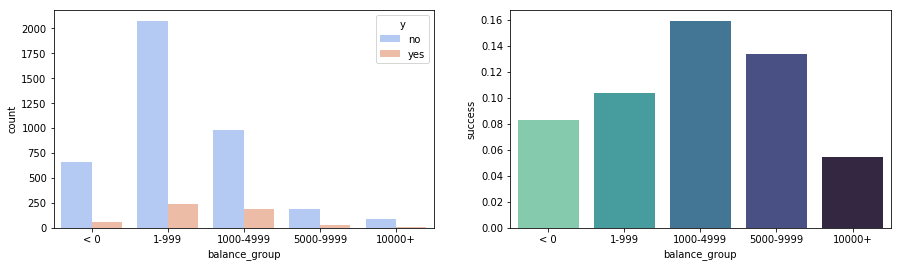

In [48]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='balance_group',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.barplot(x='balance_group',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])

In [49]:
bins = [0,5,11,100]
bin_labels = ['< 5','5-10','> 10']
full_df['duration_group'] = pd.cut(full_df.duration, bins, right=False, labels = bin_labels)

In [50]:
full_df['duration_group'].value_counts()

< 5     3255
5-10     928
> 10     338
Name: duration_group, dtype: int64

In [51]:
full_df[['duration_group', 'success']].groupby(['duration_group'], as_index=False).mean()

,duration_group,success
0,< 5,0.050384
1,5-10,0.204741
2,> 10,0.494083


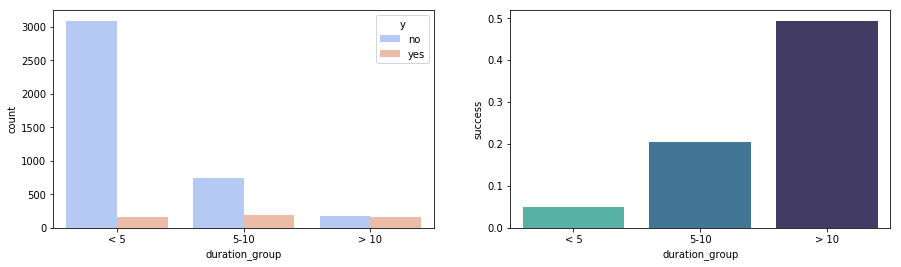

In [52]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='duration_group',hue='y',data=full_df,palette='coolwarm',ax=axes[0])
sns.barplot(x='duration_group',y='success',data=full_df,palette='mako_r',ci=None,ax=axes[1])

## Results: Continuous variables 

### Keep:

    1. age_group
    2. balance_group
    3. duration_group
    4. was_contacted_cat

<h5>pdays - DROP</h5>
pdays will be dropped because the variable <b>was_contacted</b> was created. no point in keeping 2 of the same variable. This will also hopefully keep our variables independent of one another.  That being said, lets look a little closer in the next section at <b>duration</b> and <b>was_contacted</b> to see which one we should keep. 

## Step 2: 
##  mapping variables

Variables to keep for analysis:
    1. job - convert to dummy
    2. marital - convert to dummy
    3. education - convert to dummy
    4. housing
    5. loan
    6. age_group - convert to dummy
    7. balance_group - convert to dummy
    8. duration_group
    9. was_contacted_cat - convert to dummy - drop 
    

In [53]:
run_df = full_df.copy(deep=True)

In [54]:
#drop
to_drop = ['age','default','balance','contact','day','month','campaign','duration_group','previous','pdays'
           ,'poutcome','y','was_contacted','was_contacted_cat']
run_df = run_df.drop(to_drop ,axis=1) 

In [55]:
#map
run_df['housing'] = run_df['housing'].map({'yes':1, 'no':0})
run_df['loan'] = run_df['loan'].map({'yes':1, 'no':0})

In [56]:
#re-order
run_df = run_df[['success','job','marital','education','housing','loan','age_group','balance_group','duration']]

In [57]:
run_df.head()

,success,job,marital,education,housing,loan,age_group,balance_group,duration
0,0,unemployed,married,primary,0,0,30-39,1000-4999,1.316667
1,0,services,married,secondary,1,1,30-39,1000-4999,3.666667
2,0,management,single,tertiary,1,0,30-39,1000-4999,3.083333
3,0,management,married,tertiary,1,1,30-39,1000-4999,3.316667
4,0,blue-collar,married,secondary,1,0,50-59,< 0,3.766667


In [58]:
#get dummies
run_df=pd.get_dummies(data=run_df, columns=['job','marital','education','age_group','balance_group'], 
              prefix=['job','marital','education','age_group','balance_group'])

In [59]:
run_df.head()

,success,housing,loan,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,age_group_0-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,balance_group_< 0,balance_group_1-999,balance_group_1000-4999,balance_group_5000-9999,balance_group_10000+
0,0,0,0,1.316667,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,1,3.666667,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,3.083333,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,1,3.316667,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,3.766667,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# TESTING

Duration is by far the most highly correlated variable to success.  
looking at the <b>was_contacted</b> variable that was created shows some positive correlation, especially in the 6-10 bin but I think it is worth dropping in favour of keep just <b>duration</b>. if the client was contact is nice to know but it is really the duration of that contact that matters.  

<h5>duration</h5>
keeping duration as a continuous variable as opposed to a categorical variable gives us a higher correlation. As such i think it is worth while keeping it as continuous. --try to find best practices for this
<h5>was_contacted - DROP</h5>
this variable would also not be independent of duration and therefore should be dropped


In [60]:
corr = run_df.corr()
corr

,success,housing,loan,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,age_group_0-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+,balance_group_< 0,balance_group_1-999,balance_group_1000-4999,balance_group_5000-9999,balance_group_10000+
success,1.000000,-0.104683,-0.070517,0.401118,0.006568,-0.068147,-0.015968,0.004872,0.032634,0.086675,...,0.041421,-0.033023,-0.024506,-0.025510,0.125847,-0.044070,-0.037433,0.082102,0.012939,-0.027485
housing,-0.104683,1.000000,0.018451,0.015740,0.045632,0.175040,-0.002577,-0.070044,-0.049460,-0.162856,...,0.013269,0.115359,0.045518,-0.122437,-0.170490,0.031370,-0.001322,0.000630,-0.030956,-0.031843
loan,-0.070517,0.018451,1.000000,-0.004997,0.035866,0.017244,0.049794,-0.016287,-0.042099,-0.008822,...,-0.011293,-0.006699,0.000182,0.046284,-0.059417,0.076298,0.025659,-0.061904,-0.040738,-0.035097
duration,0.401118,0.015740,-0.004997,1.000000,-0.038763,0.028114,0.016267,0.017588,-0.006884,0.019331,...,0.013648,0.010237,-0.009147,-0.030089,0.034273,-0.001916,-0.014583,0.031946,-0.006478,-0.032742
job_admin.,0.006568,0.045632,0.035866,-0.038763,1.000000,-0.176876,-0.067550,-0.054803,-0.179592,-0.079606,...,0.025729,0.012984,0.012710,-0.035454,-0.031399,0.008945,0.000038,0.014915,-0.040190,-0.008799
job_blue-collar,-0.068147,0.175040,0.017244,0.028114,-0.176876,1.000000,-0.101057,-0.081987,-0.268679,-0.119095,...,-0.008557,0.018519,0.040948,-0.025972,-0.074650,0.015897,0.023039,-0.013943,-0.034103,-0.027924
job_entrepreneur,-0.015968,-0.002577,0.049794,0.016267,-0.067550,-0.101057,1.000000,-0.031311,-0.102609,-0.045483,...,-0.029975,-0.009990,0.029893,0.015730,-0.027147,-0.025097,0.025501,-0.009477,-0.005819,0.013096
job_housemaid,0.004872,-0.070044,-0.016287,0.017588,-0.054803,-0.081987,-0.031311,1.000000,-0.083246,-0.036900,...,-0.032004,-0.054583,-0.009024,0.090320,0.027293,0.008110,0.004556,-0.029338,0.010813,0.037502
job_management,0.032634,-0.049460,-0.042099,-0.006884,-0.179592,-0.268679,-0.102609,-0.083246,1.000000,-0.120923,...,-0.058174,0.062151,0.013609,-0.023466,-0.048458,-0.010239,-0.049184,0.030507,0.044101,0.039250
job_retired,0.086675,-0.162856,-0.008822,0.019331,-0.079606,-0.119095,-0.045483,-0.036900,-0.120923,1.000000,...,-0.076717,-0.182834,-0.118905,0.171151,0.513574,-0.018624,-0.023913,0.016943,0.042194,0.016537


In [61]:
# Extract the success column (the dependent variable)
corr_success = pd.DataFrame(corr['success'].drop('success'))
test3 = corr_success.sort_values(by ='success', ascending = False)

In [215]:
test3 = test3.reset_index()
results_corr = test3.rename(columns={'index': 'feature','success':'correlation'})
results_corr

,feature,correlation
0,duration,0.401118
1,age_group_60+,0.125847
2,job_retired,0.086675
3,balance_group_1000-4999,0.082102
4,education_tertiary,0.056649
5,job_student,0.047809
6,marital_single,0.045815
7,age_group_0-29,0.041421
8,marital_divorced,0.034840
9,job_management,0.032634


# Models

    1. Naive Bayes Models
        1. Multinomial - good for when your features (categorical or continous) describe discrete frequency counts 
        2. Bernoulli - good for making predictions from binary features
        3. Gaussian - good for making predictions form normally distributed features
    2. Gradient Boosting Classifier
    3. Decision tree model
        1. SMOTE
        2. ADASYN
    4. Random Forest


In [62]:
array = run_df.values
X = array[:,1:] # Features/Independent Variables
Y = array[:,0] # Dependent Variable

In [64]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE, ADASYN


In [83]:
# results table
names = run_df.columns
names_index = names[1:]

log_cols = ['Classifier - Dataset', 'Accuracy', 'Precision Score', 'Recall Score', 'F1-Score', 'roc-auc-score']
log = pd.DataFrame(columns=log_cols)

In [84]:
test_size = 0.3
seed = 15
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

### Gaussian Naive Bayes

https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

In [85]:
name = 'GaussianNB'
clf = GaussianNB()
# cross valification
cv_10_name = name + ' - cv'
cv_10_accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = 10).mean()
cv_10_precision = cross_val_score(clf, X_train, y_train, scoring='precision', cv = 10).mean()
cv_10_recall = cross_val_score(clf, X_train, y_train, scoring='recall', cv = 10).mean()
cv_10_f1 = cross_val_score(clf, X_train, y_train, scoring='f1', cv = 10).mean()
cv_10_roc_auc = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv = 10).mean()
log_entry = pd.DataFrame([[cv_10_name,cv_10_accuracy,cv_10_precision,cv_10_recall,cv_10_f1,cv_10_roc_auc]], columns=log_cols)
log = log.append(log_entry)

# fitting model
clf.fit(X_train,y_train)
test_name = name + ' - test'
pred=clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test,pred)
precision = metrics.precision_score(y_test,pred,average='macro')
recall = metrics.recall_score(y_test,pred,average='macro')
f1_score = metrics.f1_score(y_test,pred,average='macro')
roc_auc = metrics.roc_auc_score(pred,y_test)
log_entry = pd.DataFrame([[test_name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
log = log.append(log_entry)
log

,Classifier - Dataset,Accuracy,Precision Score,Recall Score,F1-Score,roc-auc-score
0,GaussianNB - cv,0.837225,0.322106,0.399762,0.356053,0.723728
0,GaussianNB - test,0.843773,0.654038,0.680290,0.665238,0.654038


### BernoulliNB

In [87]:
name = 'BernoulliNB'
clf = BernoulliNB()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

cv_10_name = name + ' - cv'
cv_10_accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = 10).mean()
cv_10_precision = cross_val_score(clf, X_train, y_train, scoring='precision', cv = 10).mean()
cv_10_recall = cross_val_score(clf, X_train, y_train, scoring='recall', cv = 10).mean()
cv_10_f1 = cross_val_score(clf, X_train, y_train, scoring='f1', cv = 10).mean()
cv_10_roc_auc = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv = 10).mean()
log_entry = pd.DataFrame([[cv_10_name,cv_10_accuracy,cv_10_precision,cv_10_recall,cv_10_f1,cv_10_roc_auc]], columns=log_cols)
log = log.append(log_entry)

# fitting model
clf.fit(X_train,y_train)
test_name = name + ' - test'
pred=clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test,pred)
precision = metrics.precision_score(y_test,pred,average='macro')
recall = metrics.recall_score(y_test,pred,average='macro')
f1_score = metrics.f1_score(y_test,pred,average='macro')
roc_auc = metrics.roc_auc_score(pred,y_test)
log_entry = pd.DataFrame([[test_name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
log = log.append(log_entry)
log

,Classifier - Dataset,Accuracy,Precision Score,Recall Score,F1-Score,roc-auc-score
0,GaussianNB - cv,0.837225,0.322106,0.399762,0.356053,0.723728
0,GaussianNB - test,0.843773,0.654038,0.680290,0.665238,0.654038
0,BernoulliNB - cv,0.877371,0.255684,0.061825,0.097518,0.641662
0,BernoulliNB - test,0.881356,0.743318,0.540983,0.546628,0.743318


In [187]:
score=cross_val_score(ber, X_train, y_train, scoring='accuracy', cv = 10)
print('Accuracy: {0: 0.3f} (+/- {1: 0.3f})'.format(score.mean(), score.std() / 2))
accuracy_train=round(ber.score(X_train, y_train)*100,2)
print('train accuracy of BernoulliNB classifier',accuracy_train)
accuracy_test=round(ber.score(X_test, y_test)*100,2)
print('test accuracy of BernoulliNB classifier',accuracy_test)

Accuracy:  0.877 (+/-  0.004)
train accuracy of BernoulliNB classifier 87.99
test accuracy of BernoulliNB classifier 88.14


### Gradient Boosting Classifier

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

In [170]:
Name = 'GradientBoostingClassifier'
gbc = GradientBoostingClassifier(n_estimators=100, random_state=seed)
gbc.fit(X_train, y_train)
pred=gbc.predict(X_test)

accuracy = metrics.accuracy_score(y_test,pred)
precision = metrics.precision_score(y_test,pred,average='macro')
recall = metrics.recall_score(y_test,pred,average='macro')
f1_score = metrics.f1_score(y_test,pred,average='macro')
roc_auc = metrics.roc_auc_score(pred,y_test)
cv_10 = cross_val_score(gbc, X_train, y_train, scoring='accuracy', cv = 10).mean()
cv_3 = cross_val_score(gbc, X_train, y_train, scoring='accuracy', cv = 3).mean()

log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cv_10,cv_3]], columns=log_cols)
log = log.append(log_entry)

In [171]:
res_list=list(zip(names_index, gbc.feature_importances_))
results_gbc = pd.DataFrame(res_list,columns=['feature','importance'])
results_gbc = results_gbc[['feature','importance']].sort_values(by='importance', ascending=False)

### Decision Tree

In [141]:
dt = tree.DecisionTreeClassifier(random_state=seed)

param_dist = {'max_depth': [3, 5, None],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(dt, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_dt.fit(X_train, y_train)
print('Best Parameters using grid search:',cv_dt.best_params_)

Best Parameters using grid search: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None}


In [142]:
# Decision tree with depth = 3
Name = 'DecisionTree'
dt = tree.DecisionTreeClassifier(random_state=seed, max_depth=3)
dt.fit(X_train, y_train)
pred=dt.predict(X_test)

accuracy = metrics.accuracy_score(y_test,pred)
precision = metrics.precision_score(y_test,pred,average='macro')
recall = metrics.recall_score(y_test,pred,average='macro')
f1_score = metrics.f1_score(y_test,pred,average='macro')
roc_auc = metrics.roc_auc_score(y_test,pred)
cv_10 = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv = 10).mean()
cv_3 = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv = 3).mean()

log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cv_10,cv_3]], columns=log_cols)
log = log.append(log_entry)

In [143]:
res_list=list(zip(names_index, dt.feature_importances_))
results_dt = pd.DataFrame(res_list,columns=['feature','importance'])
results_dt = results_dt[['feature','importance']].sort_values(by='importance', ascending=False)

In [144]:
accuracy_train=round(dt.score(X_train, y_train)*100,2)
print('train accuracy of decision tree classifier',accuracy_train)
accuracy_test=round(dt.score(X_test, y_test)*100,2)
print('test accuracy of decision tree classifier',accuracy_test)

train accuracy of decision tree classifier 89.44
test accuracy of decision tree classifier 88.65


### Random Forest

In [145]:
rf = RandomForestClassifier(random_state=seed)
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search:',cv_rf.best_params_)

Best Parameters using grid search: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


C:\Users\rdryden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [146]:
Name = 'RandomForest'
rf = RandomForestClassifier(n_estimators = 100, random_state = seed)
rf.fit(X_train, y_train)
pred=rf.predict(X_test)

accuracy = metrics.accuracy_score(y_test,pred)
precision = metrics.precision_score(y_test,pred,average='macro')
recall = metrics.recall_score(y_test,pred,average='macro')
f1_score = metrics.f1_score(y_test,pred,average='macro')
roc_auc = metrics.roc_auc_score(pred,y_test)
cv_10KFold = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv = 10).mean()
cv_3KFold = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv = 3).mean()

log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cv_10,cv_3]], columns=log_cols)
log = log.append(log_entry)

In [147]:
res_list=list(zip(names_index, rf.feature_importances_))
results_rf = pd.DataFrame(res_list,columns=['feature','importance'])
results_rf = results_rf[['feature','importance']].sort_values(by='importance', ascending=False)

### Resample - DecisionTree - SMOTE

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://imbalanced-learn.org/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn

In [148]:
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
X_retrain, X_retest, y_retrain, y_retest = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=seed)

In [149]:
Name = 'DecisionTree SMOTE'
dtSMOTE = tree.DecisionTreeClassifier(random_state=seed, max_depth=3)
dtSMOTE.fit(X_retrain, y_retrain)
pred=dtSMOTE.predict(X_retest)

accuracy = metrics.accuracy_score(y_retest,pred)
precision = metrics.precision_score(y_retest,pred,average='macro')
recall = metrics.recall_score(y_retest,pred,average='macro')
f1_score = metrics.f1_score(y_retest,pred,average='macro')
roc_auc = metrics.roc_auc_score(y_retest,pred)
cv_10 = cross_val_score(dtSMOTE, X_retrain, y_retrain, scoring='accuracy', cv = 10).mean()
cv_3 = cross_val_score(dtSMOTE, X_retrain, y_retrain, scoring='accuracy', cv = 3).mean()

log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cv_10,cv_3]], columns=log_cols)
log = log.append(log_entry)

In [150]:
res_list=list(zip(names_index, dtSMOTE.feature_importances_))
results_SMOTE = pd.DataFrame(res_list,columns=['feature','importance'])
results_SMOTE = results_SMOTE[['feature','importance']].sort_values(by='importance', ascending=False)

### Resample - DecisionTree - ADASYN

In [151]:
X_resampled, y_resampled = ADASYN().fit_resample(X, Y)
X_retrain, X_retest, y_retrain, y_retest = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=seed)

In [152]:
Name = 'DecisionTree ADASYN'
dtADASYN = tree.DecisionTreeClassifier(random_state=seed, max_depth=3)
dtADASYN.fit(X_retrain, y_retrain)
pred=dtADASYN.predict(X_retest)

accuracy = metrics.accuracy_score(y_retest,pred)
precision = metrics.precision_score(y_retest,pred,average='macro')
recall = metrics.recall_score(y_retest,pred,average='macro')
f1_score = metrics.f1_score(y_retest,pred,average='macro')
roc_auc = metrics.roc_auc_score(y_retest,pred)
cv_10 = cross_val_score(dtADASYN, X_retrain, y_retrain, scoring='accuracy', cv = 10).mean()
cv_3 = cross_val_score(dtADASYN, X_retrain, y_retrain, scoring='accuracy', cv = 3).mean()

log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cv_10,cv_3]], columns=log_cols)
log = log.append(log_entry)

In [153]:
res_list=list(zip(names_index, dtADASYN.feature_importances_))
results_ADASYN = pd.DataFrame(res_list,columns=['feature','importance'])
results_ADASYN = results_ADASYN[['feature','importance']].sort_values(by='importance', ascending=False)

# Results

In [175]:
log

,Classifier,Accuracy,Precision Score,Recall Score,F1-Score,roc-auc_Score,cv_10,cv_3
0,GaussianNB,0.843773,0.654038,0.680290,0.665238,0.654038,0.837225,0.653506
0,GradientBoostingClassifier,0.881356,0.717839,0.600604,0.627839,0.717839,0.887488,0.885905
0,DecisionTree,0.886514,0.771849,0.572436,0.595512,0.572436,0.887804,0.886220
0,RandomForest,0.869565,0.663547,0.583518,0.602931,0.663547,0.887804,0.886220
0,DecisionTree SMOTE,0.795417,0.798035,0.794934,0.794767,0.794934,0.785181,0.784825
0,DecisionTree ADASYN,0.792648,0.792645,0.792640,0.792642,0.792640,0.774093,0.774258
0,GradientBoostingClassifier,0.879882,0.710850,0.579026,0.601811,0.710850,0.890017,0.888433
0,BernoulliNB,0.881356,0.743318,0.540983,0.546628,0.743318,0.877371,0.875157


Text(0.5,1,'Decision Tree')

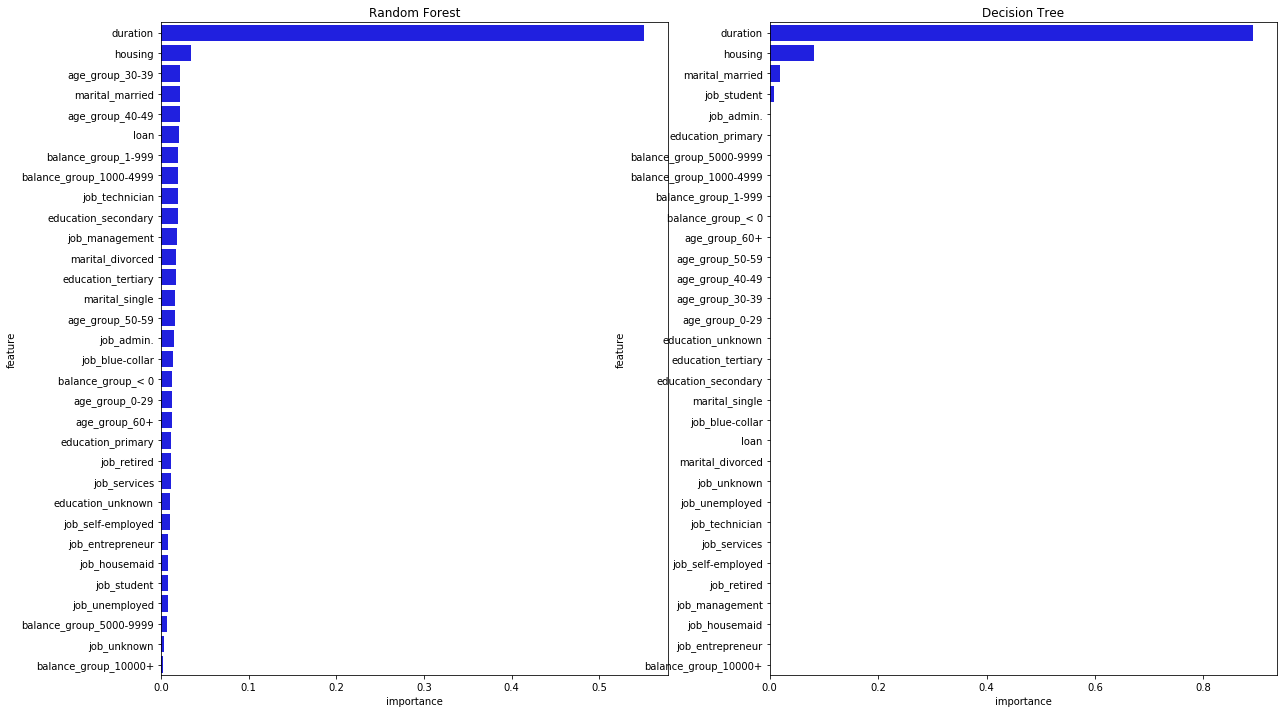

In [156]:
fig, axes = plt.subplots(1,2,figsize=(20,12))
sns.barplot(x='importance',y='feature',data=results_rf, color='b',ci=None, ax=axes[0])
axes[0].set_title('Random Forest')
sns.barplot(x='importance',y='feature',data=results_dt, color='b',ci=None, ax=axes[1])
axes[1].set_title('Decision Tree')

Text(0.5,1,'Decision Tree ADASYN')

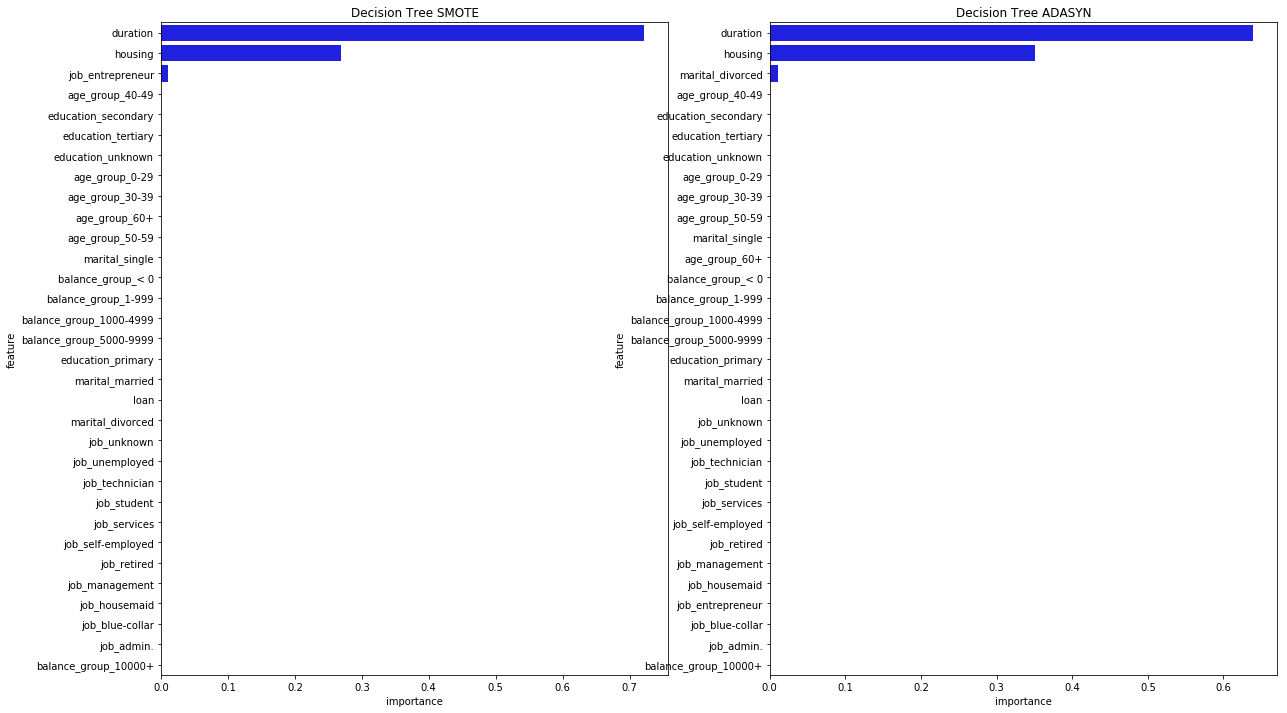

In [157]:
fig, axes = plt.subplots(1,2,figsize=(20,12))
sns.barplot(x='importance',y='feature',data=results_SMOTE, color='b',ci=None, ax=axes[0])
axes[0].set_title('Decision Tree SMOTE')
sns.barplot(x='importance',y='feature',data=results_ADASYN, color='b',ci=None, ax=axes[1])
axes[1].set_title('Decision Tree ADASYN')

Text(0.5,1,'correlation')

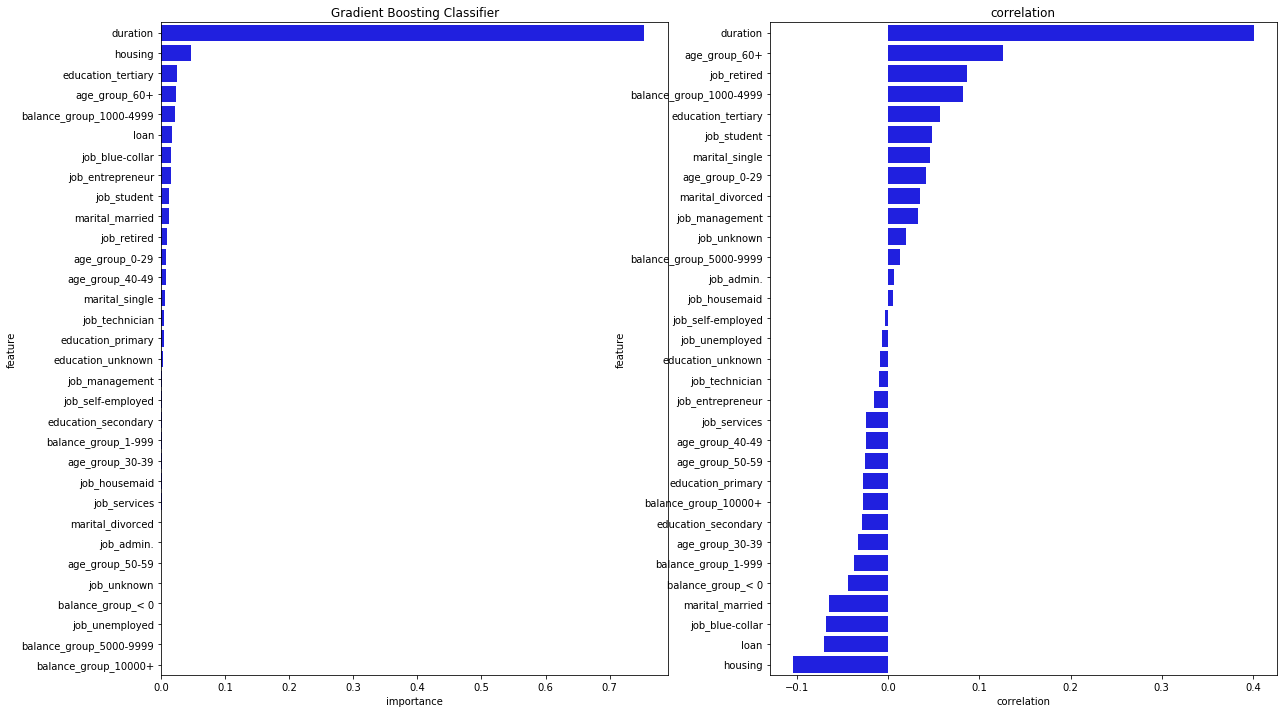

In [218]:
fig, axes = plt.subplots(1,2,figsize=(20,12))
sns.barplot(x='importance',y='feature',data=results_gbc, color='b',ci=None, ax=axes[0])
axes[0].set_title('Gradient Boosting Classifier')
sns.barplot(x='correlation',y='feature',data=results_corr, color='b',ci=None, ax=axes[1])
axes[1].set_title('correlation')

Some helpful links

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.kaggle.com/mayurjain/ml-bank-marketing-solution

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

re-run the models for more accurate results 
present evaluation results cross-validation
test accuracy and cross val. should be similar.  this will tell you if model is generalized
what is the re-call metric concept. - recall is ratio about what was correctly predicted.
need to use over-sampling

use gridsearchCV to optimze hyperparameters for decision tree models

show validation and test accuracy together. SHOW THE MODEL IS GENERALIZED
